In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# roc curve

In [2]:
np.random.seed(1)
cancer = datasets.load_breast_cancer()
# print description
# print(cancer.DESCR)

In [3]:
# get the data
X = cancer.data
y = cancer.target

Podzielmy zbiór na część testową i treningową.

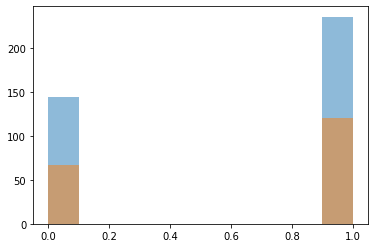

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

In [5]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

Zad.
Naucz 

* SVC()
* SVC(C=1, gamma=0.00001)
* LogisticRegression(C=1)

Dla wszystkich modleli wylicz:

* precision    
* recall  
* f1-score
* accuracy
* roc_auc_score

i narysuj krzywą roc

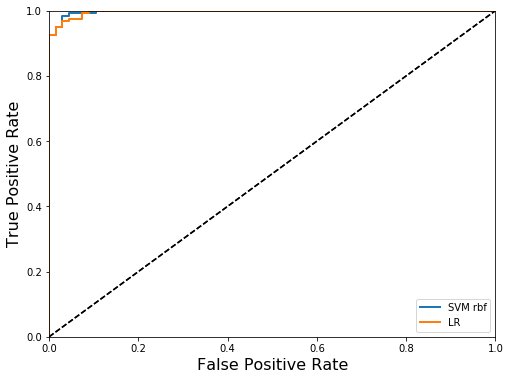

auc SVM 0.9974096459849513
auc LR  0.9967928950289873


In [29]:
cl1 = SVC(C=1, gamma=0.00001, probability=True)
cl1.fit(X_train, y_train)

cl2 = LogisticRegression(C=1, solver='newton-cg')
cl2.fit(X_train, y_train)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = cl1.predict_proba(X_test)[:,1]  )
fpr2, tpr2, thresholds2 = roc_curve(y_true = y_test, y_score = cl2.predict_proba(X_test)[:,1]  )

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)


plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr, label="SVM rbf")
plot_roc_curve(fpr2, tpr2, label="LR")
plt.legend()
plt.show()

from sklearn.metrics import roc_auc_score

print("auc SVM", roc_auc_score(y_true = y_test, y_score = cl1.predict_proba(X_test)[:,1] ))
print("auc LR ", roc_auc_score(y_true = y_test, y_score = cl2.predict_proba(X_test)[:,1] ))

In [24]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = cl1.decision_function(X_test)  )



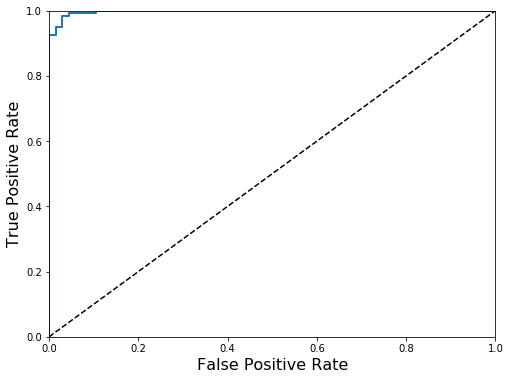